<a href="https://www.kaggle.com/code/britneyduffy/trade-ahead-pgp-dsba?scriptVersionId=136335727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Trade & Ahead

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform PCA
from sklearn.decomposition import PCA

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the dataset
data = pd.read_csv("/kaggle/input/stock-datacsv/stock_data.csv")


## Data Overview

- Observations
- Sanity checks

In [3]:
data.shape

(340, 15)

* The data has 340 rows and 15 columns

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**

- 7 float variables, 4 integers, and 4 objects


In [7]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

 - No duplicates exist in the data

In [8]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Ticker Symbol                   0.0
Security                        0.0
GICS Sector                     0.0
GICS Sub Industry               0.0
Current Price                   0.0
Price Change                    0.0
Volatility                      0.0
ROE                             0.0
Cash Ratio                      0.0
Net Cash Flow                   0.0
Net Income                      0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
P/E Ratio                       0.0
P/B Ratio                       0.0
dtype: float64

- There are no missing values in the data

In [9]:
# to change display of exponents
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [10]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings Per Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated Shares Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


**Observations:**
- Values of all the variables lies between - 2.352800e+10 and 2.444200e+10
- Very wide range of data with large standard deviations especially in columns like Net Cash Flow, Net Income, and estimated shares outstanding
- There are 340 different enteries =, indicating 340 different companies stocks 


In [11]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

**Observations**
- We can see a large amount of negative values 
- Values apeearing in scientific notation again under P/B Ratio, Estimated Shares Outstanding,and Price Change 


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis


In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

- We will not run analysis on "Ticker Symbol"or "Security" as each value is unique/or evenly distributed

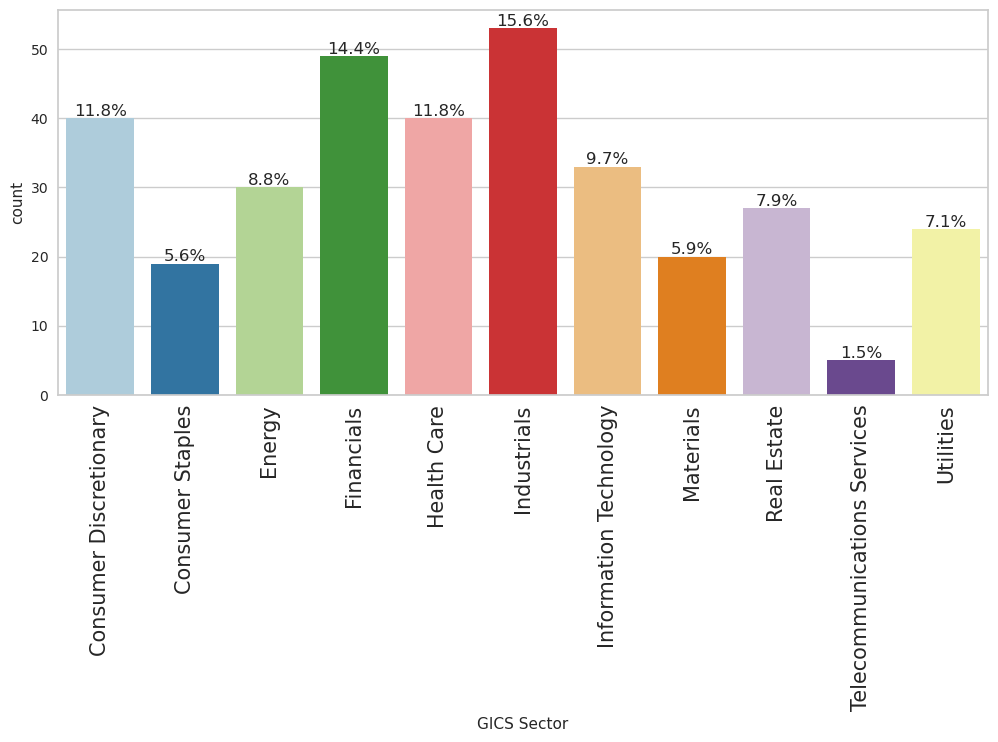

In [13]:
labeled_barplot(df, "GICS Sector", perc=True)

- Industrials is the largest sector at 15.6% followed by financals at 14.4%
- Telecommunications is the smallest with only 1.5% 

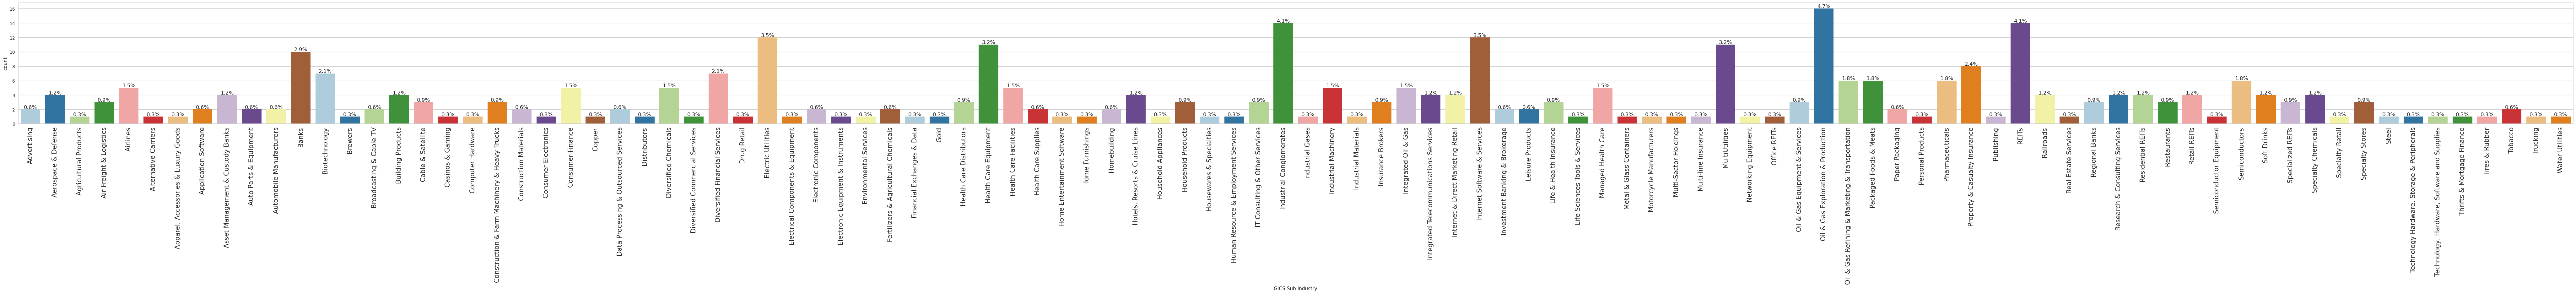

In [14]:
labeled_barplot(df, "GICS Sub Industry", perc=True)

- The most significant sub industry at 4.7% is Oil & Gas Exploration and Production, followed by REITS at 4.1%
- There are a large number of subindustries at 0.3% 

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

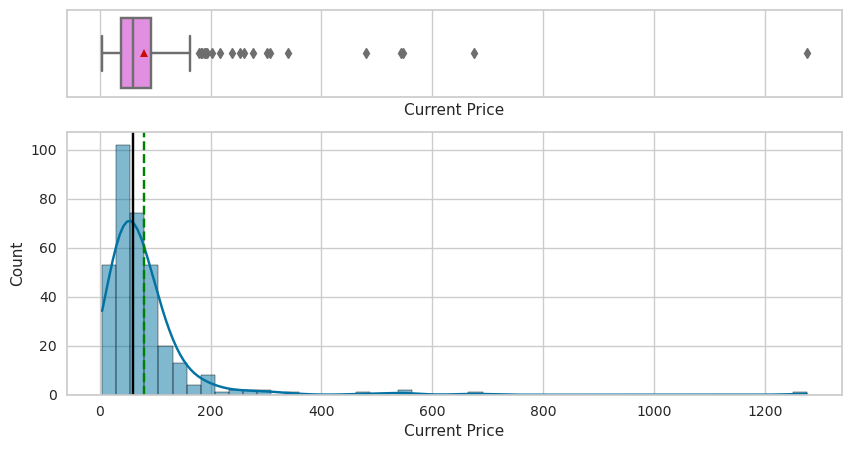

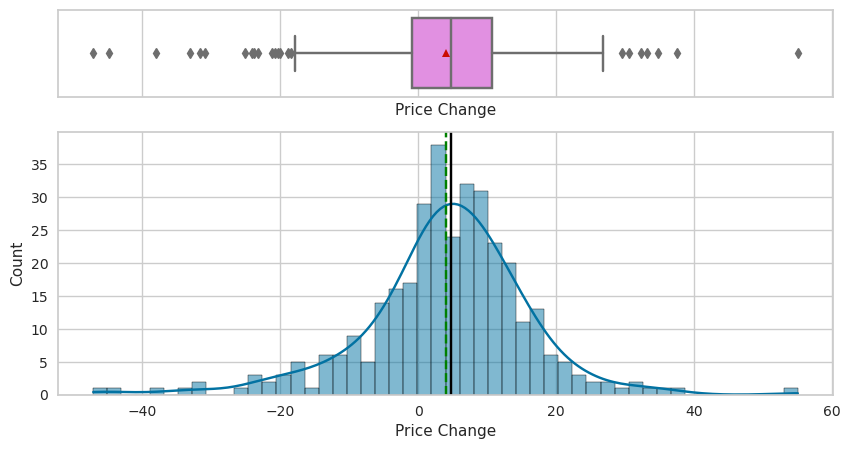

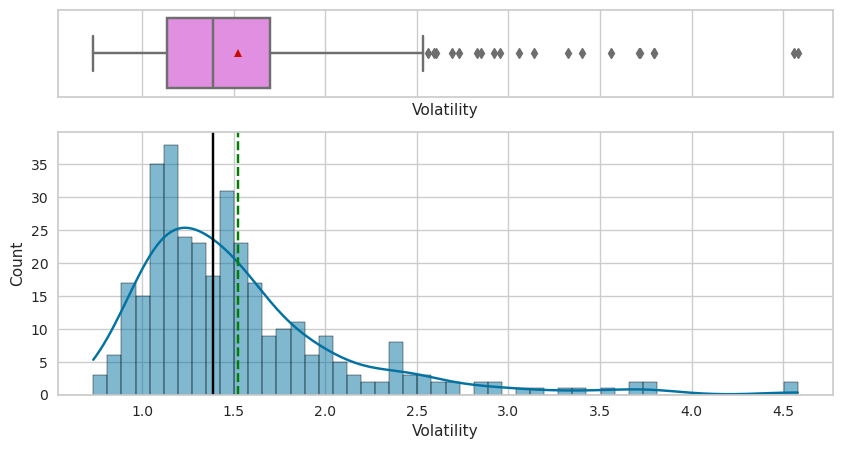

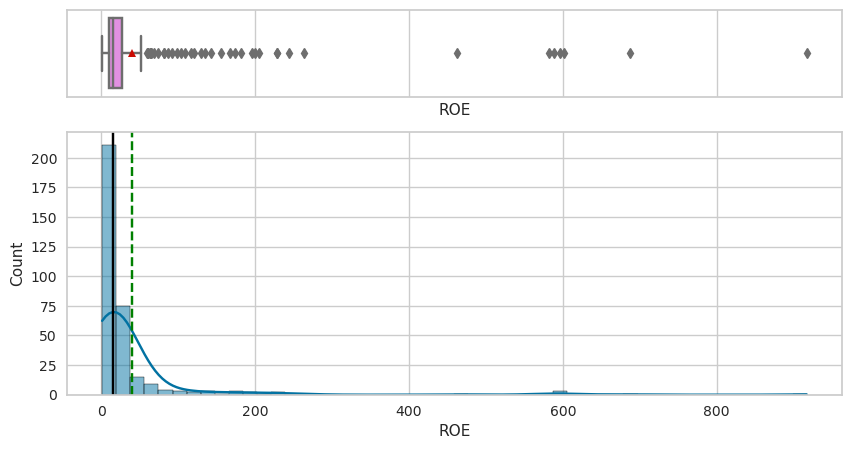

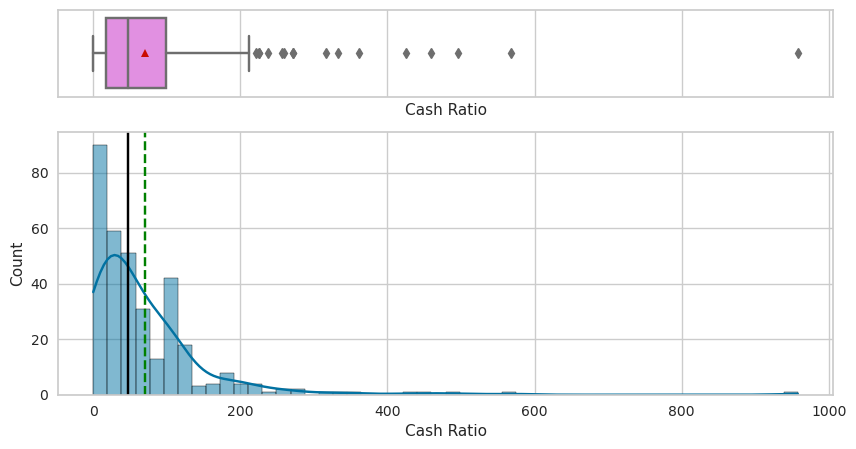

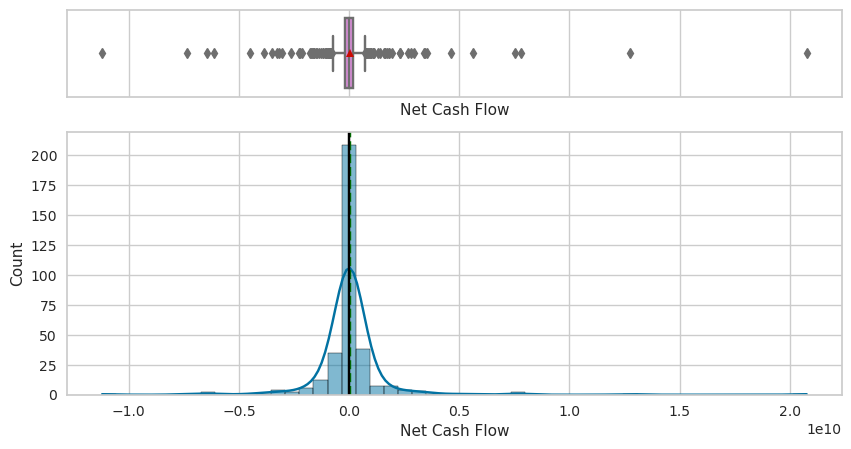

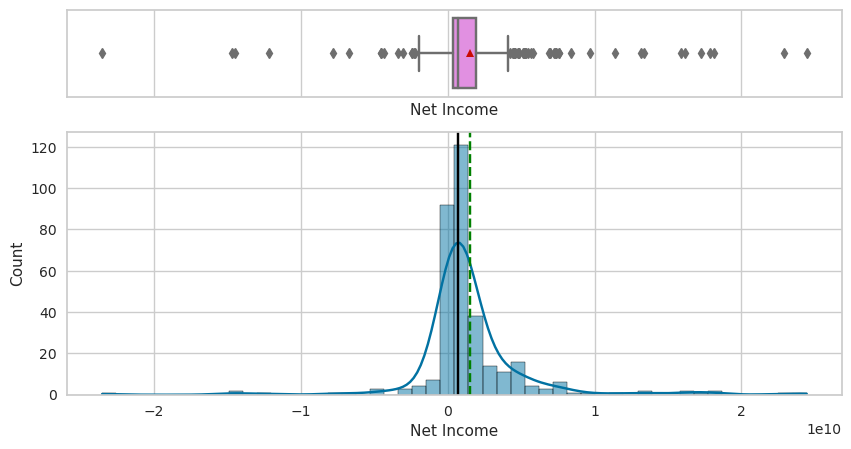

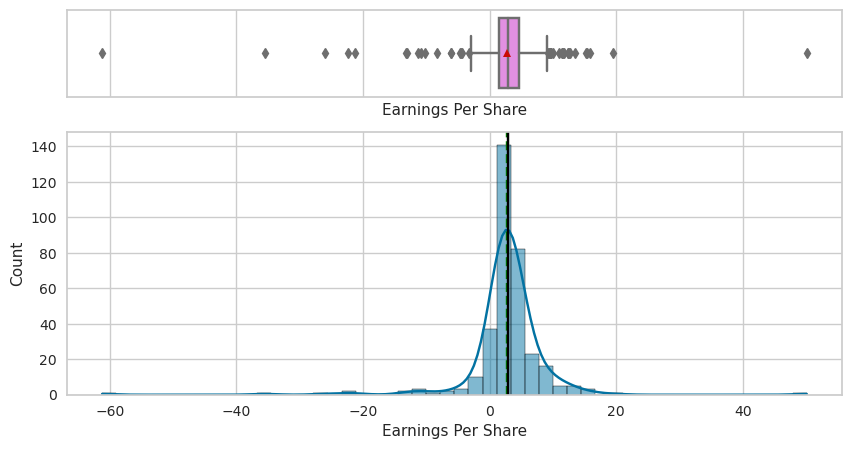

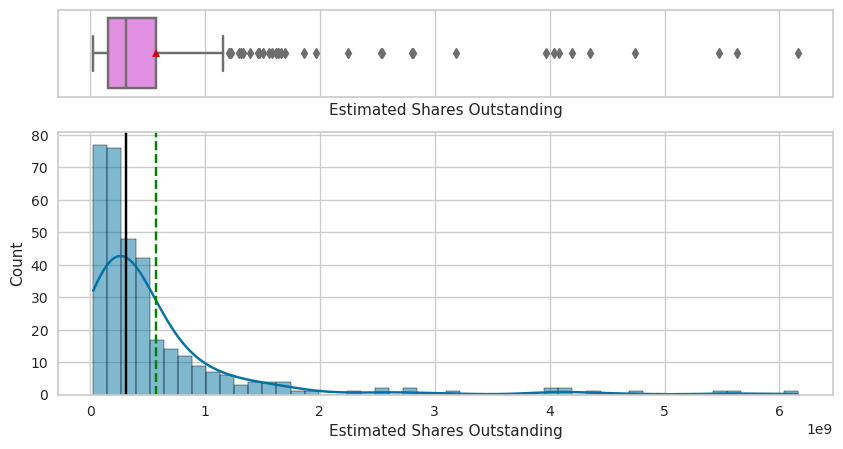

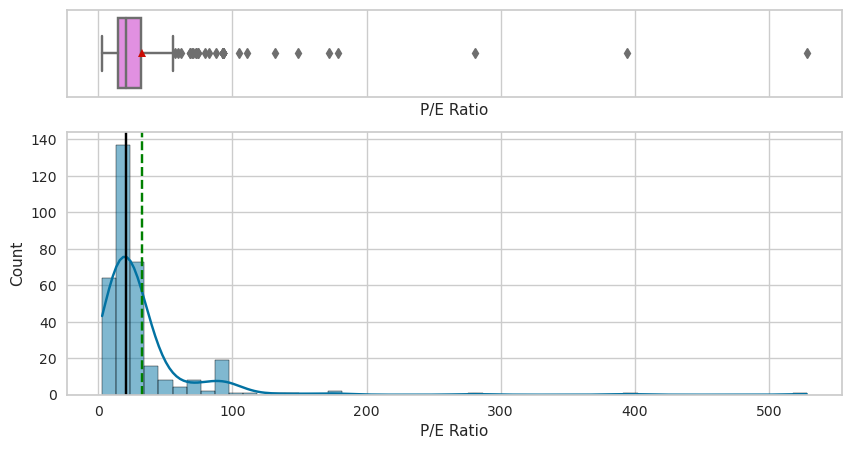

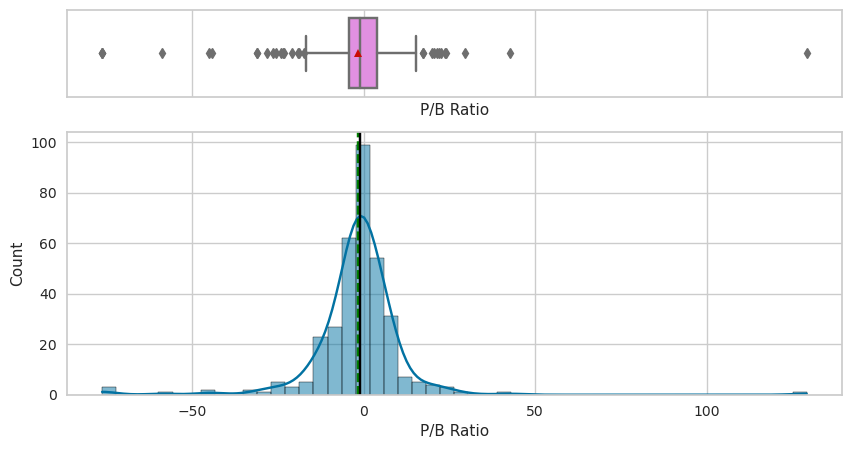

In [16]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

**Observations**
- Price change & Net Income appear near normally distributed 
- Net Cash Flow, Earnings Per Share, and P/B Ratio have slight skews
- Data that is right-skewed and contains extreme upper outliers includes: Current Price, Volitility, ROE, Cash Ratio, Estimated Shares Outstanding, and P/E Ratio

### Bivariate Analysis
**Let's check for correlations**

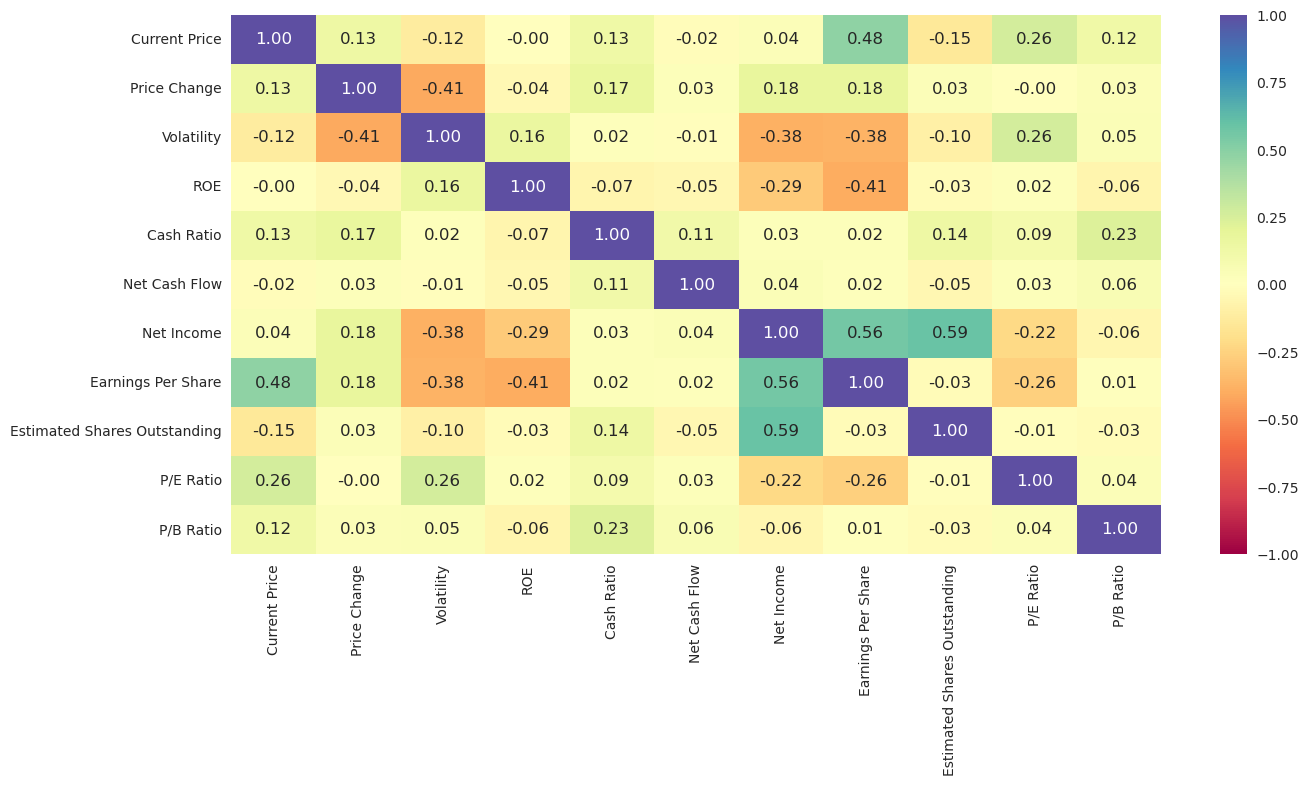

In [17]:
#heatmap to show numeric correlations 
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**
- There are no significant correlations (over 0.7)in the data 
- The strongest positve correlations are Net Income to Earnings Per Share and Estimated Shares Outstanding which makes sense at a company with higher revenue would tend to have more shares at a higher value 
- The largest negative correlation is Earnings Per Share to ROE

## Data Preprocessing

In [18]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [19]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [20]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)


## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2659355306126447
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.1258973049869914
Number of Clusters: 6 	Average Distortion: 2.0640988932177615
Number of Clusters: 7 	Average Distortion: 2.027081760411388
Number of Clusters: 8 	Average Distortion: 1.9870647126683092


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

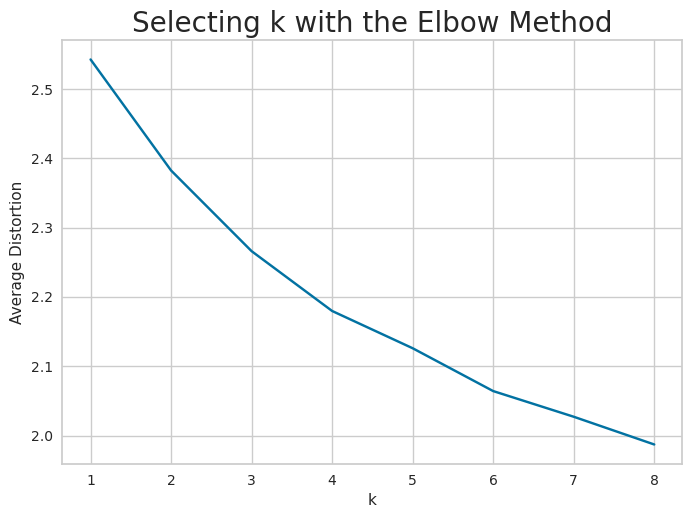

In [21]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Appropriate value for k seems to be 4 or 5.**

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.44600165785164264
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.5026075770543469
For n_clusters = 5, silhouette score is 0.41110012801644985
For n_clusters = 6, silhouette score is 0.42004461721280995
For n_clusters = 7, silhouette score is 0.401235533083541
For n_clusters = 8, silhouette score is 0.41224632620743346
For n_clusters = 9, silhouette score is 0.10706855426260986


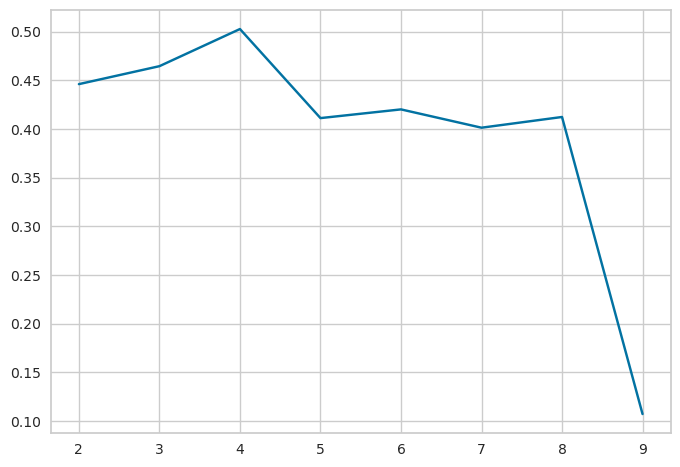

In [22]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Silhouette score for 5 is higher than that for 4. So, we will choose 5 as value of k.**

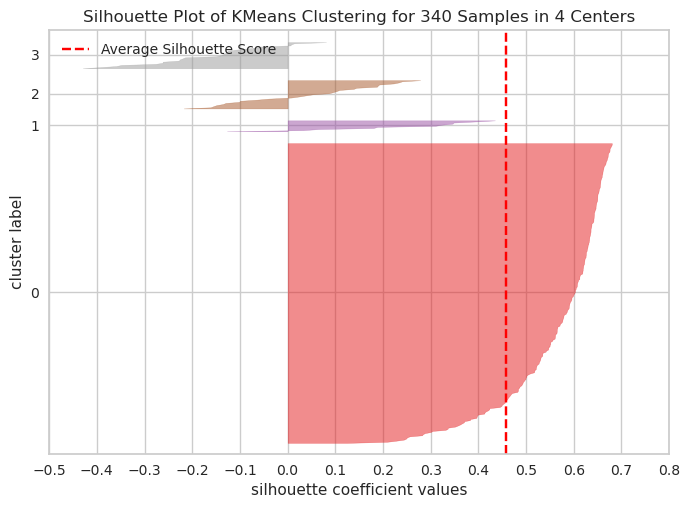

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4 , random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

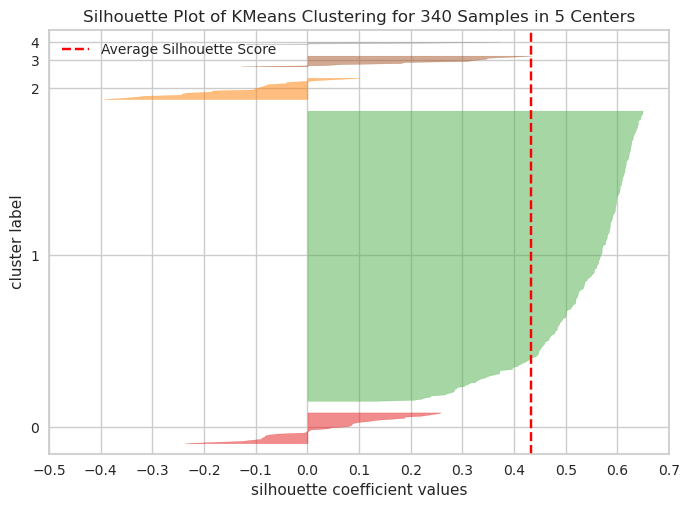

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [25]:
# let's take 5 as number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)


KMeans(n_clusters=5, random_state=0)

In [26]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [27]:
cluster_profile = df.groupby("K_means_segments").mean()

In [28]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Current Price"].count().values
)

In [29]:
# let's see the names of the industries in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following industries are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["GICS Sector"].unique())
    print()

In cluster 4, the following industries are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 0, the following industries are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Consumer Staples']

In cluster 1, the following industries are present:
['Information Technology' 'Energy' 'Industrials' 'Materials' 'Financials'
 'Consumer Discretionary']

In cluster 3, the following industries are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']

In cluster 2, the following industries are present:
['Financials' 'Consumer Discretionary' 'Health Care'
 'Information Technology' 'Consumer Staples' 'Telecommunications Services'
 'Energy']



In [30]:
# let's see the names of the sub industries in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following Companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 4, the following Companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 'Citizens 

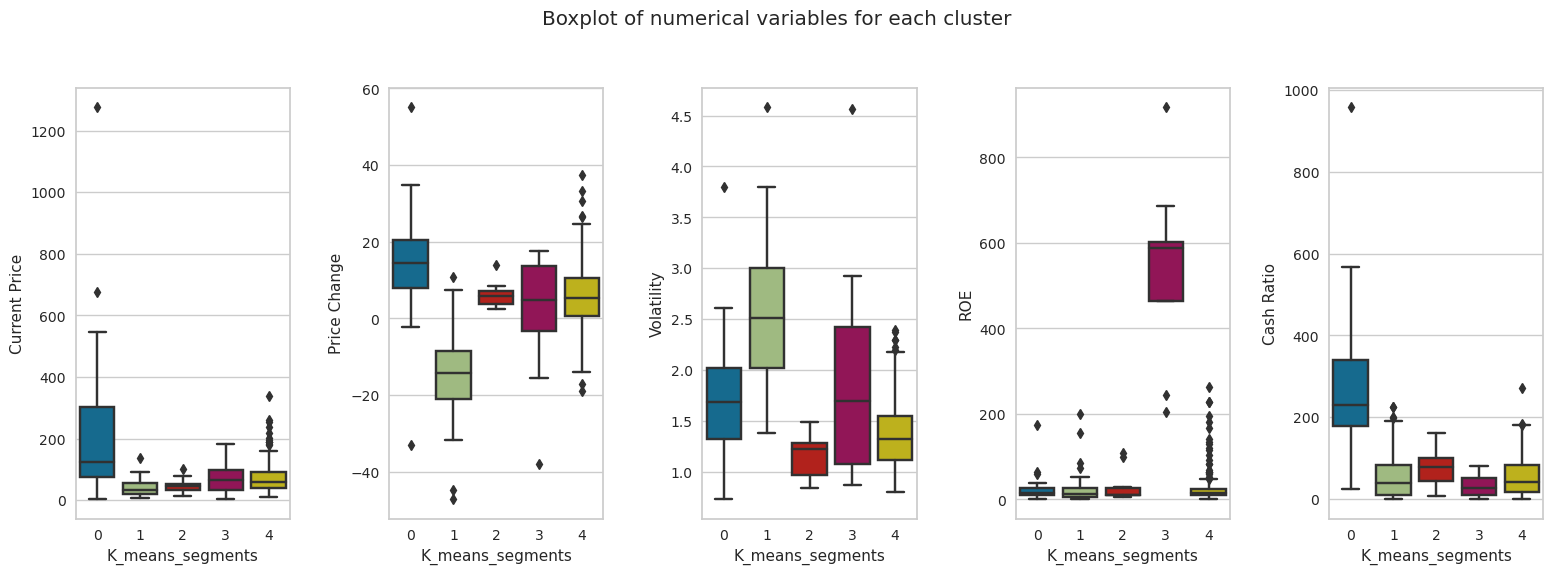

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

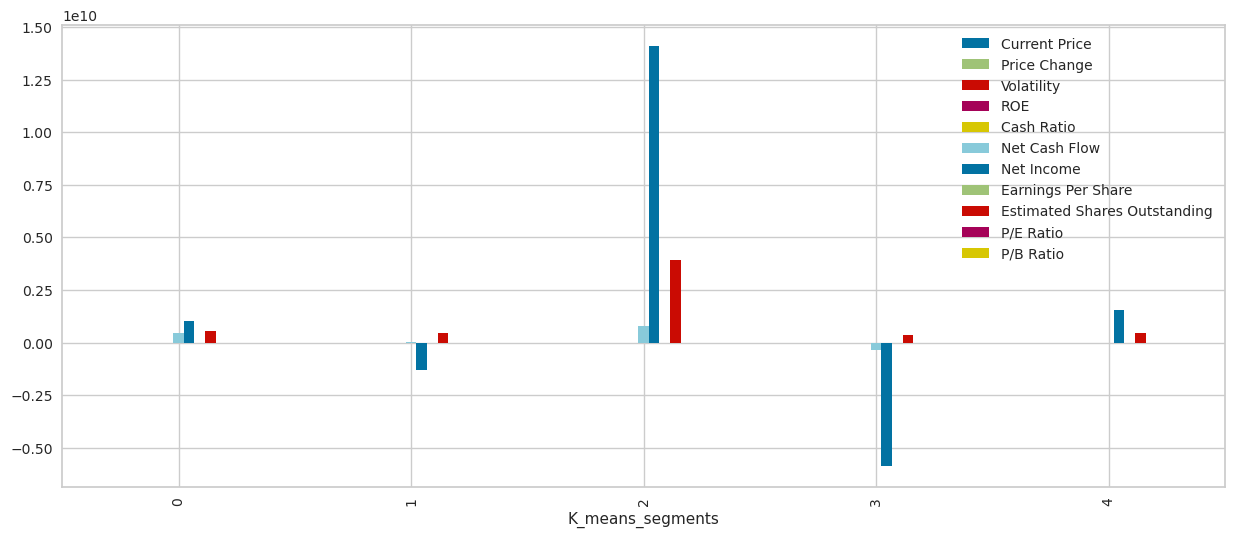

In [32]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [33]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


### Insights

**Cluster 0:**
- Industries; Information Technology, Health Care, Consumer Discretionary, Real Estate, Telecommunications Services, Consumer Staples
    - Average stock price here is 246.57 USD and the highest of this set of clusters
    - This segment also have the highest Price change, Cash Ratio, Earnings Per Share, P/E Ratio, and P/B Ratio

**Cluster 1:**
- Information Technology, Energy, Industrials, Materials, Financials, Consumer Discretionary
    - Average stock price is the lowest 41.37
    - The only cluster with negative Price Change -14.85 
    - Volatility here is the highest
    - Net cash flow is positive while net income is negative 
       
**Cluster 2:**
- Financials, Consumer Discretionary, Health Care, Information Technology, Consumer Staples, Telecommunications Services, Energy
    - Average stock price here is low at 48.10 USD
    - Volatility appears low compared to the price change
    - Companies in this cluster have the highest Net Cash Flow and Net Income
    - Earnings per share are relatively high at 3.96 and this category also has the greatest number of shares outstanding 3,918,734,987 

**Cluster 3:**
- Industries; Industrials, Energy, Consumer Discretionary, Consumer Staples, Financials
    - This is the smallest segment with a count of 9
    - Average stock price is 72.78 USD
    - Net Cash Flow, Net Income, and Earnings Per Share are all negative resulting in a negative P/B value
    - ROE of this cluster is the highest
    
**Cluster 4:**
- Industries; Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Telecommunications Services, Energy
    - The majority of our data lies in this cluster with a count of 259.
    - The average price of these shares is 72.77 USD
    - This cluster has relatively low volatility and a negative net cash flow





## Hierarchical Clustering

In [34]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
        

Cophenetic correlation for Euclidean distance and single linkage is 0.9245196884893159.
Cophenetic correlation for Euclidean distance and complete linkage is 0.804706102299582.
Cophenetic correlation for Euclidean distance and average linkage is 0.9453100811955032.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6627654898087273.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9167442245950579.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8147175389813458.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9374309398424928.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.909227804034383.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9349160370798354.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8420923890794114.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9346420885297709.
Cophenetic corr

In [35]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9453100811955032, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [36]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9245196884893159.
Cophenetic correlation for complete linkage is 0.804706102299582.
Cophenetic correlation for average linkage is 0.9453100811955032.
Cophenetic correlation for centroid linkage is 0.9426384108485938.
Cophenetic correlation for ward linkage is 0.7287469098815194.
Cophenetic correlation for weighted linkage is 0.6627654898087273.


In [37]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9453100811955032, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

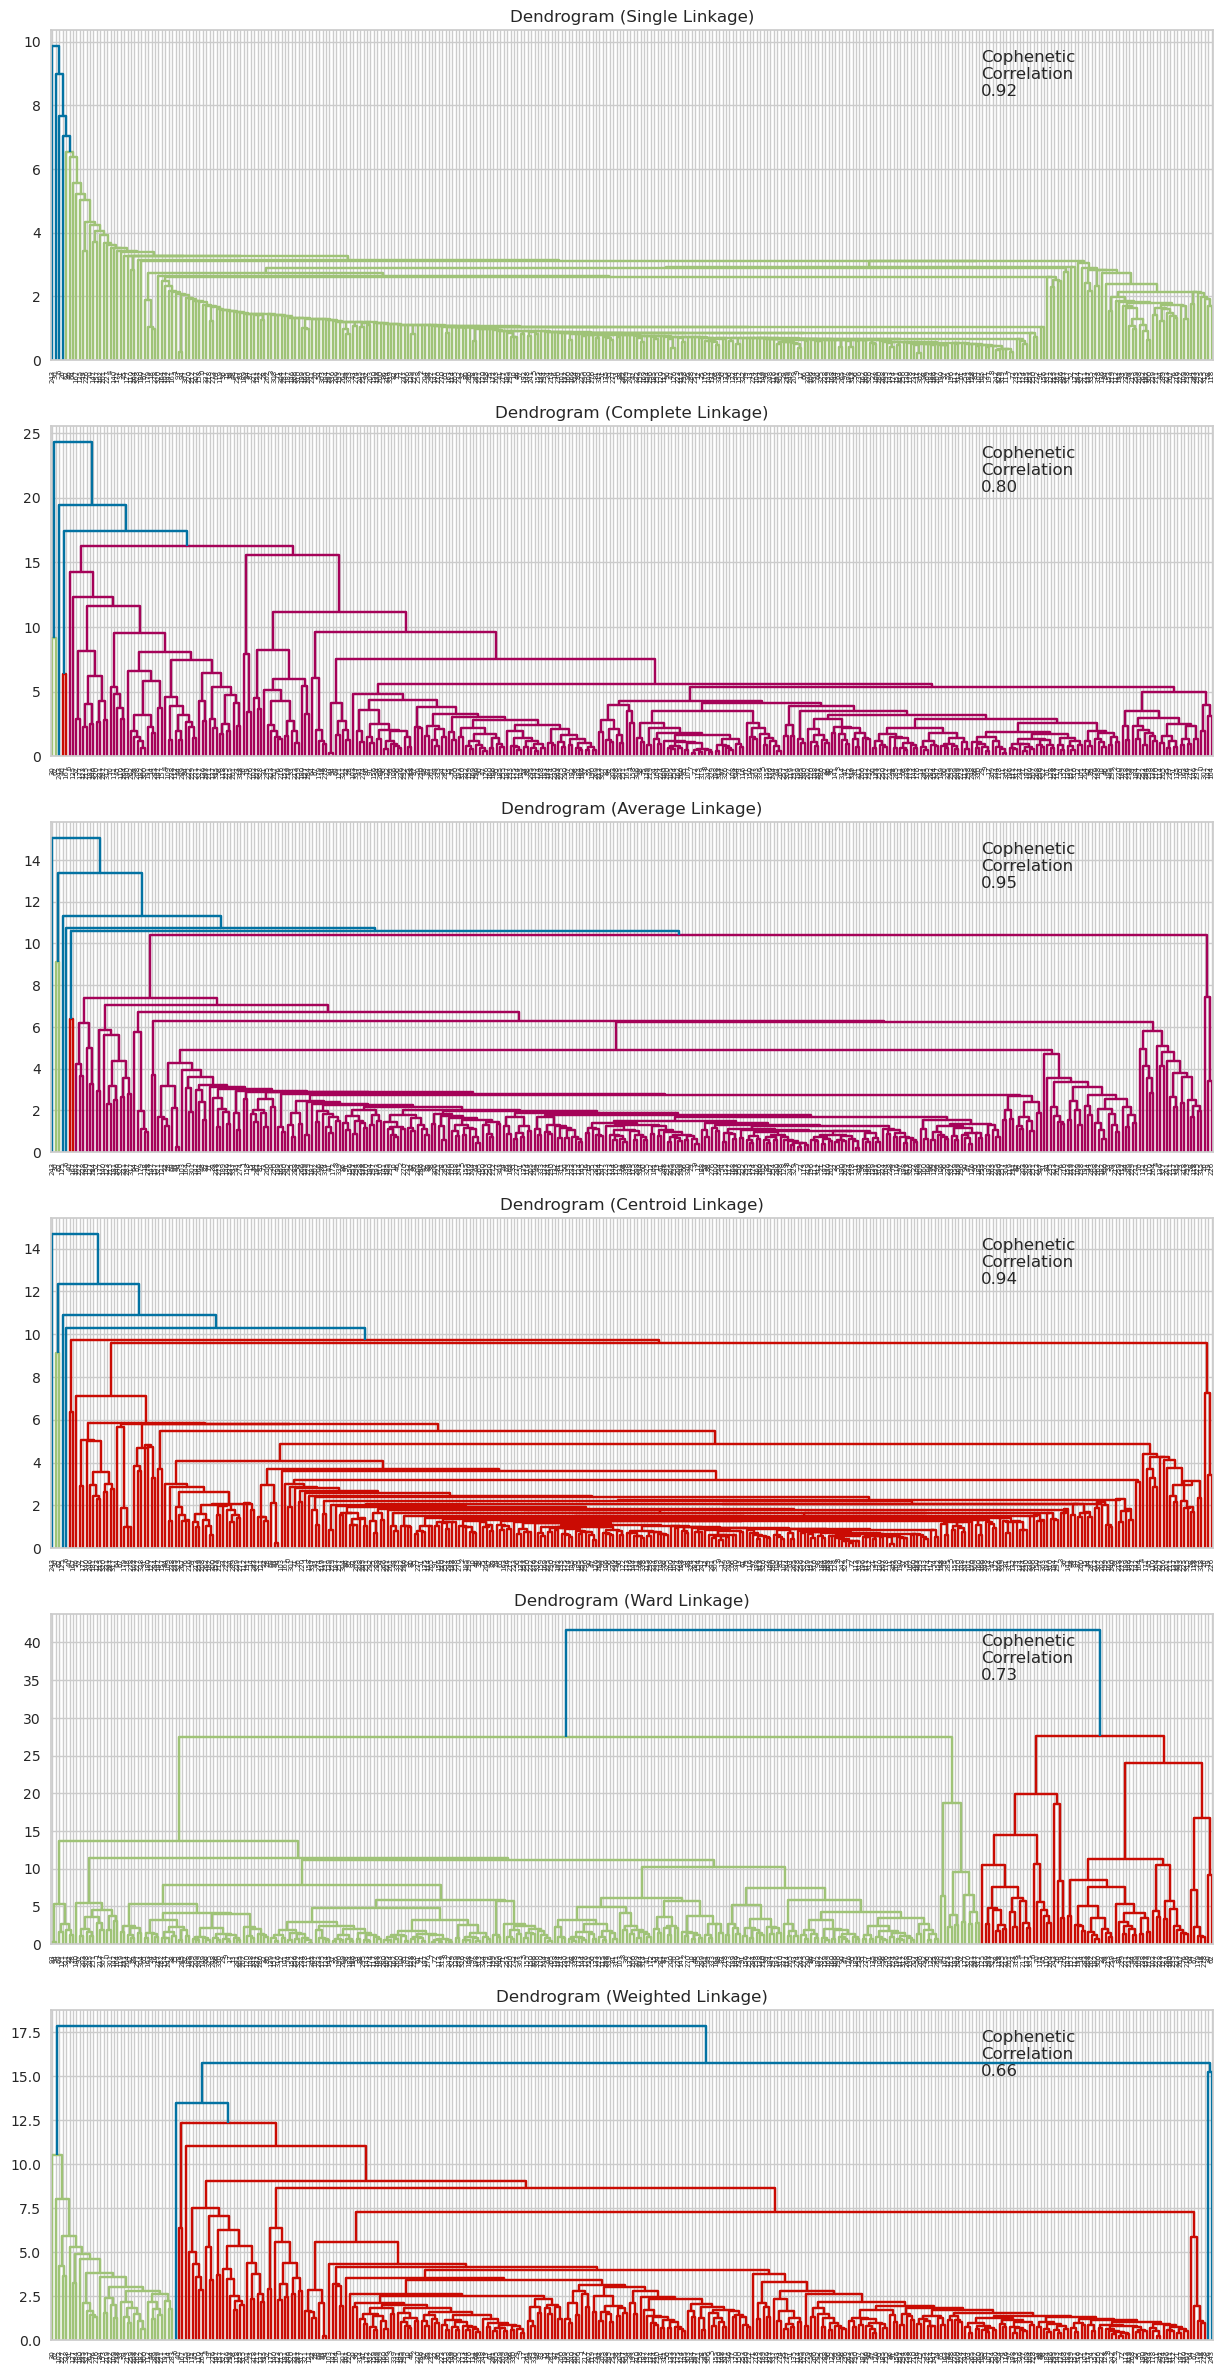

In [38]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [39]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [40]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling 

In [41]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [42]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current Price"].count().values
)

In [43]:
# let's see the names of the industries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following industries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following industries are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following industries are present:
['Energy']

In cluster 3, the following industries are present:
['Information Technology']

In cluster 1, the following industries are present:
['Consumer Discretionary']



**We see that there are 3 clusters of one sub industries, and all the other sub industries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

In [44]:
# let's see the names of the sub industries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following sub industries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["GICS Sub Industry"].unique())
    print()

In cluster 0, the following sub industries are present:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Semiconductors' 'Agricultural Products'
 'Data Processing & Outsourced Services' 'MultiUtilities'
 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Building Products' 'Biotechnology' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Specialized REITs' 'Internet & Direct Marketing Retail'
 'Specialty Stores' 'Managed Health Care'
 'Oil & Gas Exploration & Production' 'Electronic Components'
 'Aerospace & Defense' 'Home Entertainment Software' 'Residential REITs'
 'Water Utilities' 'Consumer Finance' 'Banks'
 'Oil & Gas Equipment & Services' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Re

In [45]:
# let's see the names of the Companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

<Axes: xlabel='HC_Clusters'>

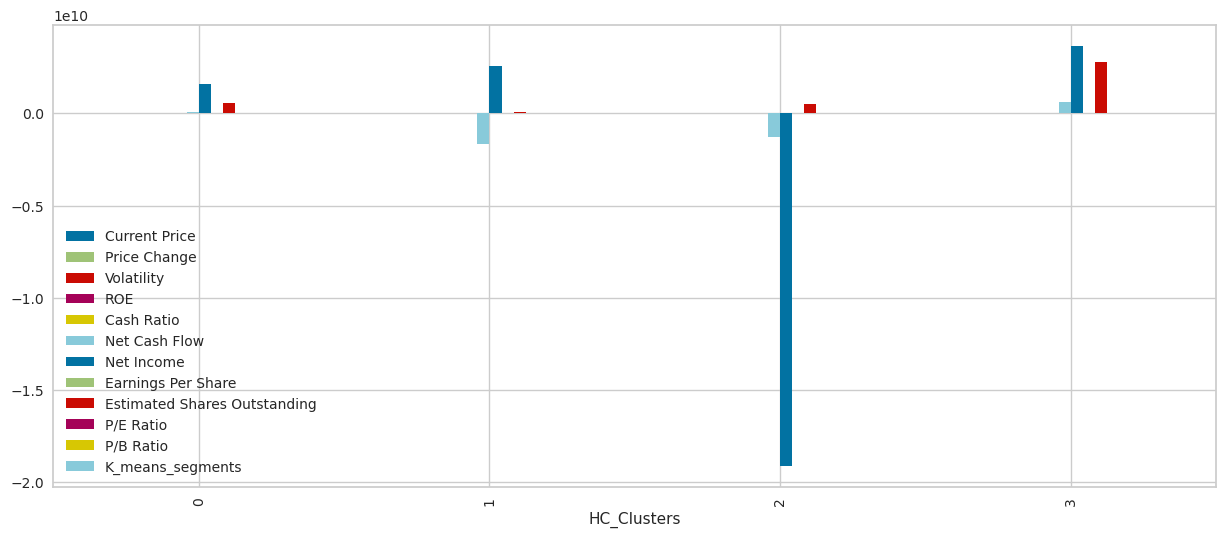

In [46]:
df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

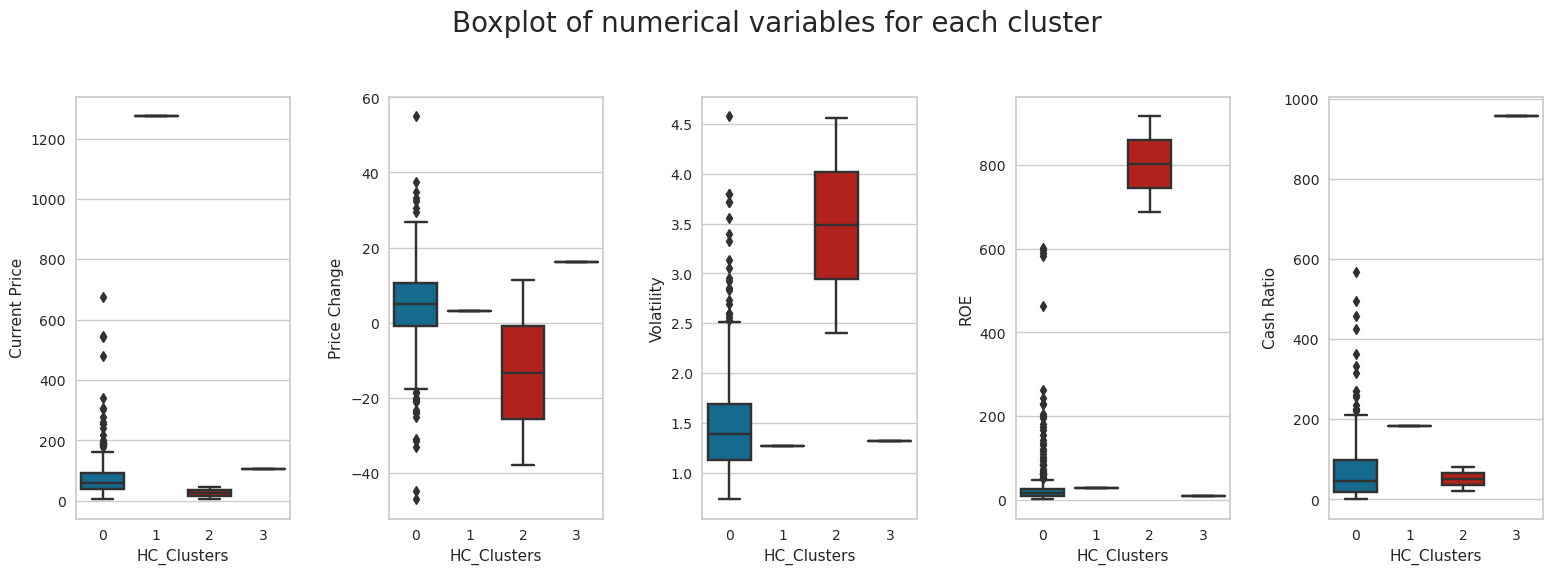

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [48]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,3.327381,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,0.000000,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,3.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,0.000000,1


### Insights

**Cluster 0:**
- Industries; Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Energy, Telecommunications Services 
    - The majority of our data lies in this cluster with a count of 355.
    - Average stock price here is 77.57 USD 
    - Volatility is relatively low with a positive net cash flow   

**Cluster 1:Priceline**
- Industry; Consumer Discretionary  
- Sub Industries; Internet & Direct Marketing Retail
    - This cluster contains more expensive premium stocks, with an average price of approximately 1275.00 USD per share and highest average Earnings Per Share of 50.00 USD
    - The downside to this cluster would be Negative Fash flow but Net Income is high and positive for these companies
       
**Cluster 2:**
- Industry; Energy  
- Sub Industries; Oil & Gas Exploration & Production, Integrated Oil & Gas
    - The listing price of stock in this cluster are by far the lowest at 27.00 USD .
    - This cluster has the lowest Net Income at -17555666666.66 USD
    - Is only comprised of 2 companies Apache and Chesapeke Energy

**Cluster 3: Facebook**
- Industry; Information Technology 
- Sub Industries; Internet Software & Services
    - This cluster contains stocks priced aroubd 104.00 USD 
    - Facebook cluster has the highest: Price Change, Cash Ratio, Net Cash Flow, Net Income, 
    - Lowest average Earnings Per Share of 50.00 USD
    - The downside to this cluster would be Negative Fash flow but Net Income is high and positive for these companies
       


## K-means vs Hierarchical Clustering

*Which clustering technique took less time for execution?*
- As far computing power both methods seem to take minimal time to run the codes but Hierarchical was slightly more time consuming. K-means did take longer in terms of total execution time as I had to find and appropriate value for K using the elbow method first and silohette scores for 2 seperate variables 

*Which clustering technique gave you more distinct clusters, or are they the same?*
- It is difficult to discern which set of clusters are more distinct, but the clusters in K-means appear to be the most varied approach


*How many observations are there in the similar clusters of both algorithms?*

**K-Means Clusters**
- 0 - 11
- 1 - 27
- 2 - 23
- 3 - 3
- 4 - 276

**HC-Clusters**
- 0 - 335
- 1 - 1
- 2 - 3
- 3 - 1

*How many clusters are obtained as the appropriate number of clusters from both algorithms?*
- For K-Means 5 Clusters were created and 4 were used in Heirarchical Clustering. 

- The clusters obtained by each method were vastly different. In K-Means the clusters had much greater diversity in industries and more distribution of companies. Hierarchical clustering resulted in clusters that contained 1 company each which seems to be an ineffective result. This could be due to its high sensitivity for outliers. 
